In [1]:
!pip install tensorflow==2.0.0 -q

     |████████████████████████████████| 86.3MB 92kB/s 
     |████████████████████████████████| 450kB 47.2MB/s 
     |████████████████████████████████| 3.8MB 34.0MB/s 


In [0]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv1D, GlobalMaxPool1D, Embedding, MaxPooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.model_selection import train_test_split

In [3]:
!wget https://lazyprogrammer.me/course_files/spam.csv

--2020-03-28 07:51:22--  https://lazyprogrammer.me/course_files/spam.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.31.80.48, 104.31.81.48, 2606:4700:3035::681f:5130, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.31.80.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/csv]
Saving to: ‘spam.csv’

spam.csv            100%[===================>] 491.86K  3.19MB/s    in 0.2s    

2020-03-28 07:51:23 (3.19 MB/s) - ‘spam.csv’ saved [503663/503663]



In [0]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [5]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [0]:
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

In [8]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [0]:
df = df.rename(columns={'v1':'label', 'v2':'data'})

In [16]:
df.head()

,label,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [0]:
df['b_labels'] = df['label'].replace({'ham':0, 'spam':1})

In [18]:
df.head()

,label,data,b_labels
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [20]:
Y = df['b_labels'].values
Y.shape

(5572,)

In [0]:
df_train, df_test, Ytrain, Ytest = train_test_split(df['data'], Y, test_size=0.33)

In [0]:
#Tokenizing the data
MAX_VOCAB_SIZE = 20000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df_train) 

In [0]:
sequence_train = tokenizer.texts_to_sequences(df_train)
sequence_test = tokenizer.texts_to_sequences(df_test)

In [31]:
word2idx = tokenizer.word_index
V = len(word2idx)
print(V)

7251


In [33]:
data_train = pad_sequences(sequence_train)
T = data_train.shape[1]
T

ERROR! Session/line number was not unique in database. History logging moved to new session 59


189

In [34]:
data_test = pad_sequences(sequence_test, maxlen=T)
data_test.shape

(1839, 189)

In [0]:
M = 20
D = 15

i = Input((T,))
x = Embedding(V+1, D)(i)
x = Conv1D(32, 3, activation='relu')(x)
x = MaxPooling1D()(x)
x = Conv1D(64, 3, activation='relu')(x)
x = MaxPooling1D()(x)
x = Conv1D(128, 3, activation='relu')(x)
x = GlobalMaxPool1D()(x)

x = Dense(1, activation='sigmoid')(x)

model = Model(i,x)

model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)


In [37]:
r = model.fit(data_train,Ytrain, validation_data=(data_test,Ytest), epochs=10)

Train on 3733 samples, validate on 1839 samples
Epoch 1/10
3733/3733 [==============================] - 5s 1ms/sample - loss: 0.3992 - accuracy: 0.8620 - val_loss: 0.3141 - val_accuracy: 0.8673
Epoch 2/10
3733/3733 [==============================] - 3s 937us/sample - loss: 0.1672 - accuracy: 0.9304 - val_loss: 0.0757 - val_accuracy: 0.9810
Epoch 3/10
3733/3733 [==============================] - 4s 944us/sample - loss: 0.0273 - accuracy: 0.9914 - val_loss: 0.0621 - val_accuracy: 0.9842
Epoch 4/10
3733/3733 [==============================] - 4s 945us/sample - loss: 0.0076 - accuracy: 0.9984 - val_loss: 0.0709 - val_accuracy: 0.9859
Epoch 5/10
3733/3733 [==============================] - 4s 950us/sample - loss: 0.0046 - accuracy: 0.9987 - val_loss: 0.0742 - val_accuracy: 0.9848
Epoch 6/10
3733/3733 [==============================] - 4s 957us/sample - loss: 0.0036 - accuracy: 0.9995 - val_loss: 0.0822 - val_accuracy: 0.9864
Epoch 7/10
3733/3733 [==============================] - 4s 952us/s

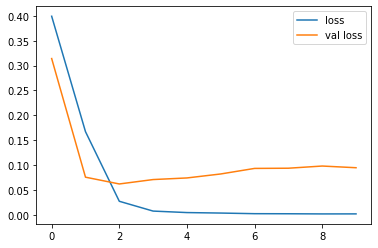

In [39]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()

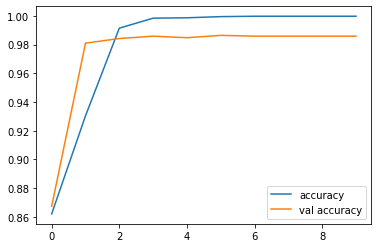

In [40]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val accuracy')
plt.legend()